# Ensemble(Voting, Bagging, RandomForest) 실습

## Voting

아래의 실습 코드는 https://excelsior-cjh.tistory.com/166 를 참고하여 구성하였다. 

이번에는 데이터셋을 임의로 만들어서 진행을 해본다. make moons라는 데이터셋을 이용해서 특정 갯수의 데이터를 만들어 낼 수 있다.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [11]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

voting 알고리즘의 경우, 여러개의 서로 다른 알고리즘을 이용해서 다수결 원칙으로 결과를 나타내는 알고리즘이다. 사용될 알고리즘은 로지스틱, SVC, decision tree를 이용하였다.

In [25]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

 - 로지스틱, decision tree, SVC 객체를 각각 생성하세요
 - VotingClassifier를 위의 생성된 3개의 객체를 이용하여 생성하세요, voting 은 hard 옵션으로 하세요

In [27]:
# 3개의 estimator 생성
logi = LogisticRegression(random_state=42)
tree= DecisionTreeClassifier(max_depth=3, random_state=42)
svc= SVC(random_state=42)

# classifier 생성 및 fit
estimator_list = [('logistic',logi),('decisiontree',tree),('svc',svc)]  # tuple들의 list로 넣음
voting_clf = VotingClassifier(estimators= estimator_list, voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('decision...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

voting 알고리즘은 방법을 hard로 하여, 다수결원칙을 따르도록 만들었다. 아래는 사용된 모델의 각 성능을 나타낸다.

In [28]:
from sklearn.metrics import accuracy_score

# 아래 for 문의 list에 생성한 4개의 모델을 넣으세요
for clf in (logi,tree ,svc ,voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.86
DecisionTreeClassifier 0.886666666667
SVC 0.913333333333
VotingClassifier 0.886666666667


다음은 voting 방식을 soft한 방법으로 진행한다. soft voting이란, 절대적 다수결이 아닌 각 모델의 가중치를 주어 그 가중치에 해당하는 결과로 예측을 하는 모형이다.

In [32]:
# 3개의 estimator 생성
logi = LogisticRegression(random_state=42)
tree= DecisionTreeClassifier(max_depth=3,random_state=42)
svc= SVC(probability= True, random_state=42)  # 예측값에 대한 확률값이 다나와야하는데, svc는 default로 확률값을 계산하고 있지않기때문에 설정

# classifier 생성 및 fit(voting=soft)
estimator_list = [('logistic', logi),('decisiontree', tree),('svc', svc)]
voting_clf = VotingClassifier(estimators= estimator_list, voting= 'soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('decision...bf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [33]:
for clf in (logi,tree ,svc ,voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.86
DecisionTreeClassifier 0.886666666667
SVC 0.913333333333
VotingClassifier 0.9


## 배깅(Bagging)

배깅은 하나의 알고리즘을 사용하지만, 학습 데이터셋을 랜덤하게 추출하여 모델을 각각 다르게 학습시키는 방법

기존의 decision tree와 bagging을 이용한 방식의 비교를 위해 두가지 모두 구현한다. 

In [37]:
# decision tree 모형을 만들고, 테스트 셋에 대한 성능(accuray)를 출력하세요
tree= DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print('Accuracy =', accuracy_score(y_test, y_pred_tree))

Accuracy = 0.853333333333


In [38]:
from sklearn.ensemble import BaggingClassifier

 - base model은 decision tree를 이용하세요
 - estmiator 갯수는 100개로 설정하세요

In [42]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=100, # 100개의 random sample 
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42) #base_estmator의 default는 decisiontree , 
bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)
print('Accuracy =', accuracy_score(y_test, y_pred))

Accuracy = 0.913333333333


각 결과를 차트로 표현해보기 위해 아래와 같이 함수를 구현하였다. 이는 참고한 사이트의 함수를 사용하였다.

In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt 
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

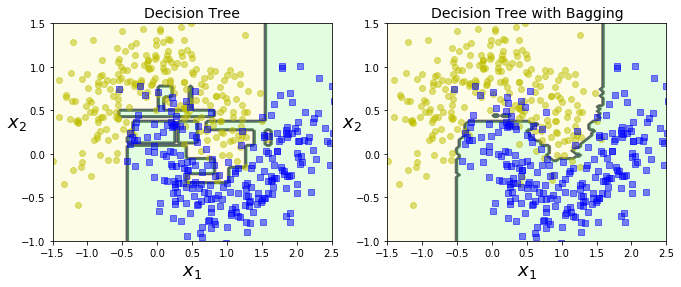

In [12]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Tree with Bagging", fontsize=14)
plt.show()

위의 결과를 살펴보면, Decision tree의 경우 depth제한 없이 모든 잎 노드가 pure 할 때까지 진행한다. 그러므로 좌측의 그림에서 파란색 데이터를 설명하기 위해 촘촘하게 조건들이 구분되어 있는 것을 확인 할 수 있다. Bagging은 총 500개의 decision tree들의 평균치를 나타내므로, 경계선이 좀 더 smooth 하게 표현되는 것을 알 수 있다.

### Random Patch & Random subspace

random patch와 random subsapce는 변수를 샘플링 하는 방법으로, bagging에서 제공하는 파라미터 중 'max_features'와 'bootstrap_features'로 적용해볼 수 있다. 이 두가지를 이용할 경우, 각 모델은 랜덤하게 선택된 변수로 학습을 진행할 수 있다.

- random patch : 데이터와 변수 모두 샘플링(bootstrapping)하는 방식이므로, 'bootstrap = True' 와 'bootstrap_features= True'로 설정한다.
- random subspace : 변수만 샘플랑 하는 방식으로, 'bootstrap = False' 와 'bootstrap_features= True'로하고 'max_features' 는 1보다 작은값을 한다.

## Random Forest

아래는 https://datascienceschool.net/view-notebook/766fe73c5c46424ca65329a9557d0918/ 을 참고하였다.

랜덤포레스트는 scikit-learn에 잘 구현되어있으므로 이를 이용한다.
이제까지 반복적으로 해왔던 작업을 그대로 수행하면된다. 기존의 decision tree와 random forest를 비교해보기위해 두가지 모델을 모두 fitting한다

아래에서 시각화를 위해서 iris 데이터 중 2개의 변수만을 이용해서 진행해본다.

In [44]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

iris = load_iris()
X, y = iris.data[:, [0, 2]], iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

 - decision tree 모델을 하나 만드세요 (max_depth =3)
 - random forest 모델을 하나 만드세요 (max_depth =3, n_estimators=100)

In [50]:
decisiontree= DecisionTreeClassifier(max_depth=3, random_state=0)
randomforest= RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)

decisiontree.fit(X_train, y_train)
randomforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

두 모델의 정확도 차이를 확인한다.

In [51]:
y_pred  = decisiontree.predict(X_test)
print('Decision Tree Accuracy =', accuracy_score(y_test, y_pred))
y_pred  = randomforest.predict(X_test)
print('Random forest Accuracy =', accuracy_score(y_test, y_pred))

Decision Tree Accuracy = 0.977777777778
Random forest Accuracy = 0.977777777778


분류결과를 시각적으로 표현해보기 위해서 다음과 같이 차트를 그려서 두 모델의 차이를 확인해본다.

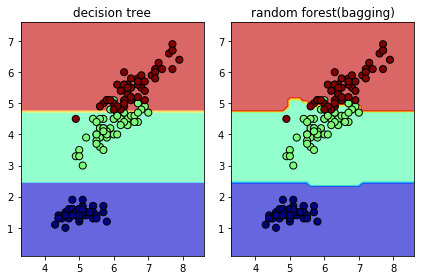

In [54]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import numpy as np

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
plt.subplot(121)
Z1 = decisiontree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("decision tree")
plt.subplot(122)
Z2 = randomforest.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("random forest(bagging)")

plt.tight_layout()
plt.show()
# 경계면에서의 차이가 있음

random forest의 장점 중 하나는 각 독립변수의 중요도를 계산할 수 있다. 알고리즘에 사용된 모든 노드에 대해 어떤 독립변수를 사용하고, 그 노드에서 얻은 정보 이득을 구할 수 있으므로, 이들의 평균치를 통해 변수들의 중요도를 확인 할 수 있다.

In [56]:
iris = load_iris()  # tree는 변수 별 중요도 알 수 있음. 랜덤포레스트도! feature_importance
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)  #500개의 트리를 보고 각각의 importance들을 알려줌
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)
    
# tree계열은 항상 feature_importance를 고려해보자!

sepal length (cm) 0.112492250999
sepal width (cm) 0.0231192882825
petal length (cm) 0.441030464364
petal width (cm) 0.423357996355


### [추가] 이미지 데이터의 픽셀 중요도 확인

이미지 데이터를 이용해서 random forest를 진행하고, 각 픽셀별 중요도를 시각화해본다. 데이터는 SVM 에서 사용했던 fetch_lfw_people 데이터를 활용해본다. SVM에서는 PCA진행했었음. 여기서는 각 픽셀의 중요도를 확인하기위해서 사용하지 않음

In [57]:
from sklearn.datasets import fetch_lfw_people

data = fetch_lfw_people(min_faces_per_person=60)

X = data.data
y = data.target


데이터를 분할하고 학습을 실행한다. 아래와 같이 진행하면 다소 시간이 소요될 수 있다.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  #약 3000개의 변수가 생성됨. why? 각각픽셀이 row로 나타나서
forest = RandomForestClassifier(n_estimators=1000, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

테스트에 대한 정확도 결과를 출력한다


In [22]:
print(forest.score(X_test,y_test))

0.6271604938271605


학습된 결과의 변수별 중요도를 확인하기 위해 시각화를 한다. 각 변수는 해당 그림에서의 각 픽셀을 의미한다. 학습된 모델의 feature_importances 는 1차원 벡터로 표현되기 때문에, 아래와 같이 그림의 크기만큼 reshape과정을 진행해야 한다.

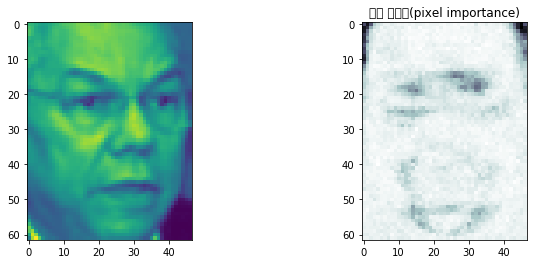

In [23]:
importances = forest.feature_importances_
importances = importances.reshape(data.images[0].shape)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.imshow(data.images[0])
plt.subplot(122)
plt.imshow(importances, cmap=plt.cm.bone_r)
plt.grid(False)
plt.title("픽셀 중요도(pixel importance)")   # 0과 1사이가 될 것. 누구인지 구분할때 어떤 픽셀이 중요한 역할을 했느냐. 
plt.show()